   Point_ID  Feature_1_X  Feature_2_Y
0         1          1.0          2.0
1         2          NaN          1.8
2         3          5.0          NaN
3         4          8.0          8.0

Handled Missing Data: 
Point_ID       0
Feature_1_X    0
Feature_2_Y    0
dtype: int64 

    Point_ID  Feature_1_X  Feature_2_Y
0         1     1.000000     2.000000
1         2     4.666667     1.800000
2         3     5.000000     3.933333
3         4     8.000000     8.000000

Centroids: 
[[2.5        4.83333333 2.86666667]
 [4.         8.         8.        ]
 [1.         1.         2.        ]] 
Labels: [2 0 0 1]


C:\Users\LabStudent\AppData\Local\Temp\ipykernel_6804\1024637260.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Feature_1_X'].fillna(df['Feature_1_X'].mean(), inplace = True)
C:\Users\LabStudent\AppData\Local\Temp\ipykernel_6804\1024637260.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

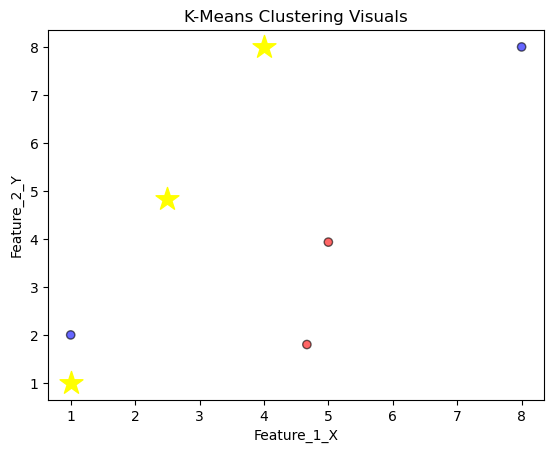

In [35]:
# K-Means Clustering Algorithm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = {
    'Point_ID': [1, 2, 3, 4],
    'Feature_1_X': [1.0, np.nan, 5.0, 8.0],
    'Feature_2_Y': [2.0, 1.8, np.nan, 8.0]
}

df = pd.DataFrame(data)
print(df)

# Handling the missing data
df['Feature_1_X'].fillna(df['Feature_1_X'].mean(), inplace = True)
df['Feature_2_Y'].fillna(df['Feature_2_Y'].mean(), inplace = True)

print(f'\nHandled Missing Data: \n{df.isnull().sum()} \n\n {df}')

# Initializing the K-Means Model
kmean = KMeans(
    n_clusters = 3,
    init = 'k-means++',
    max_iter = 300,
    n_init = 10,
    random_state = 42
)

# Fit or Train the model
kmean.fit(df)

# Extracting the results / Evaluating
centro = kmean.cluster_centers_
labels = kmean.labels_

print(f'\nCentroids: \n{centro} \nLabels: {labels}')

# Visualizing the data
# Assign colors
colors = ['red' if label == 0 else 'blue' for label in labels]

# Plot data points
plt.scatter(df['Feature_1_X'], df['Feature_2_Y'], c = colors, alpha = 0.6, edgecolors = 'k')

# Plot centroids with distinctive marker
plt.scatter(centro[:,0], centro[:,1], s = 300, c = 'yellow', marker = '*')

plt.title('K-Means Clustering Visuals')
plt.xlabel('Feature_1_X')
plt.ylabel('Feature_2_Y')
plt.show()